## Simple Linear Regression. Minimal example

### Import the relevant libraires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

f(x,z) = 2*x -3*z + 5 + noise

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
targetsNew = 13*xs + 7*zs -12 + noise

print(targets.shape)
print(targetsNew.shape)

(1000, 1)
(1000, 1)


### Plot the training data

The point is to see that there is a strong trend that our method should learn to reproduce

In [4]:
print(xs.shape)
print(zs.shape)

(1000, 1)
(1000, 1)


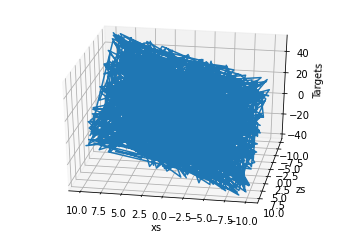

In [5]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Linear model: y = x*w + b

w = weights
b = biases

### Initialize variables

In [6]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(weights.shape)

print(biases)
print(biases.shape)

[[0.06029652]
 [0.02647872]]
(2, 1)
[-0.03516082]
(1,)


### Set a learning rate

In [7]:
learning_rate = 0.02

### Train the model

In [14]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targetsNew
    
    loss = np.sum(deltas**2) / 2 / observations
    
    print (loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.21131590426378818
0.2096654211094961
0.20808025948270376
0.20655783413924272
0.20509566215170225
0.20369135886003265
0.20234263398238553
0.20104728787989162
0.19980320796926174
0.1986083652773719
0.19746081113220543
0.1963586739847573
0.19530015635671982
0.19428353190897305
0.19330714262609183
0.19236939611228604
0.19146876299435522
0.19060377442743145
0.1897730196994395
0.18897514393035686
0.1882088458625408
0.18747287573850396
0.18676603326267752
0.18608716564385192
0.1854351657150825
0.18480897012800926
0.18420755761863988
0.18362994734176824
0.18307519727130636
0.18254240266394015
0.18203069458357526
0.18153923848418702
0.1810672328487608
0.18061390788209167
0.18017852425532646
0.17976037190018931
0.17935876885092925
0.1789730601321008
0.17860261669036337
0.17824683436855634
0.17790513292037505
0.1775769550640506
0.1772617655734726
0.17695905040529142
0.1766683158605609
0.17638908777956466
0.1761209107685076
0.17586334745681287
0.17561597778381416
0.1753783983136754
0.17515022157

### Print weights and biases and see if we have worked correctly

In [15]:
print(weights,biases)

[[12.98972971]
 [ 6.99798066]] [-11.94515001]


### Plot last outputs vs targets

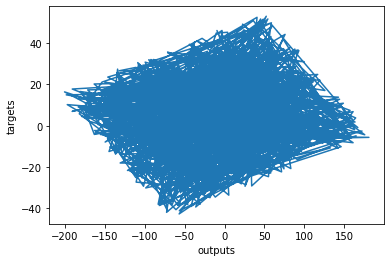

In [11]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()